In [1]:
import cobra
import pandas
import numpy
import re
from cobra.flux_analysis import pfba
from cobra.flux_analysis import single_gene_deletion, single_reaction_deletion


In [2]:
lst = cobra.io.load_json_model('../models/Lst_v0_4_forPUB.json')


Set parameter TokenServer to value "leghorn.emsl.pnl.gov"


In [5]:

# Set the objective function (maximize growth by default)
lst.objective = lst.reactions.BIOMASS_Ls

# Determine essential genes
gene_deletion_results = single_gene_deletion(lst)

# Identify essential genes (genes that, when deleted, lead to no growth)
essential_genes = gene_deletion_results[gene_deletion_results['growth'] < 1e-3].ids


Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/tmpfsvbwxfj.lp
Reading time = 0.01 seconds
: 1909 rows, 4382 columns, 17768 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/tmpjwkp3_9l.lp
Reading time = 0.01 seconds
: 1909 rows, 4382 columns, 17768 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/tmp07rw4q0a.lp
Reading time = 0.01 seconds
: 1909 rows, 4382 columns, 17768 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/tmp8fdiftnk.lp
Reading time = 0.01 seconds
: 1909 rows, 4382 columns, 17768 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/kn/zzn

In [6]:
lst

Name,Lst
Memory address,10761b150
Number of metabolites,1909
Number of reactions,2191
Number of genes,996
Number of groups,0
Objective expression,1.0*BIOMASS_Ls - 1.0*BIOMASS_Ls_reverse_27d85
Compartments,"c, m, r, e, x, v, n, g, d"


In [7]:
len(essential_genes)

202

In [8]:
# Track associated pathways for essential genes
essential_genes_pathways = {}
for gene_id in essential_genes:
    genes = list(gene_id)
    for g in genes:
        associated_reactions = lst.genes.get_by_id(g).reactions
        pathways = set()
        for reaction in associated_reactions:
            for pathway in reaction.subsystem.split(" / "):
                pathways.add(pathway)
        essential_genes_pathways[g] = tuple(pathways)  # Convert the set to a tuple

# Print essential genes and associated pathways
for gene_id, pathways in essential_genes_pathways.items():
    print(f"Essential Gene: {gene_id}")
    print("Associated Pathways:", ", ".join(pathways))
    print()


Essential Gene: Lipst1_1_4883
Associated Pathways: Purine and Pyrimidine Biosynthesis

Essential Gene: Lipst1_1_72571
Associated Pathways: Citric Acid Cycle, Anaplerotic Reactions

Essential Gene: Lipst1_1_3884
Associated Pathways: Biosynthesis of Steroids: Terpenoid Backbone Synthesis

Essential Gene: Lipst1_1_102853
Associated Pathways: Cofactor and Prosthetic Group Biosynthesis

Essential Gene: Lipst1_1_72400
Associated Pathways: tRNA Charging

Essential Gene: Lipst1_1_5288
Associated Pathways: Tyrosine, Tryptophan, and Phenylalanine Metabolism

Essential Gene: Lipst1_1_925
Associated Pathways: Porphyrin and Chlorophyll Metabolism, Glycine, Serine, and Threonine Metabolism, Glycine and Serine Metabolism

Essential Gene: Lipst1_1_3878
Associated Pathways: Threonine and Lysine Metabolism

Essential Gene: Lipst1_1_3355
Associated Pathways: Histidine Metabolism

Essential Gene: Lipst1_1_149190
Associated Pathways: Valine, Leucine, and Isoleucine Metabolism

Essential Gene: Lipst1_1_954


In [12]:
# # Save the results to a text file.
# output_file = "essential_genes_pathways_FORPUB.txt"
# with open(output_file, "w") as file:
#     for gene_index, pathways in essential_genes_pathways.items():
#         file.write(f"Essential Gene: {gene_index}\n")
#         file.write("Associated Pathways: " + ", ".join(pathways) + "\n\n")

# print("Results saved to", output_file)

Results saved to essential_genes_pathways_FORPUB.txt


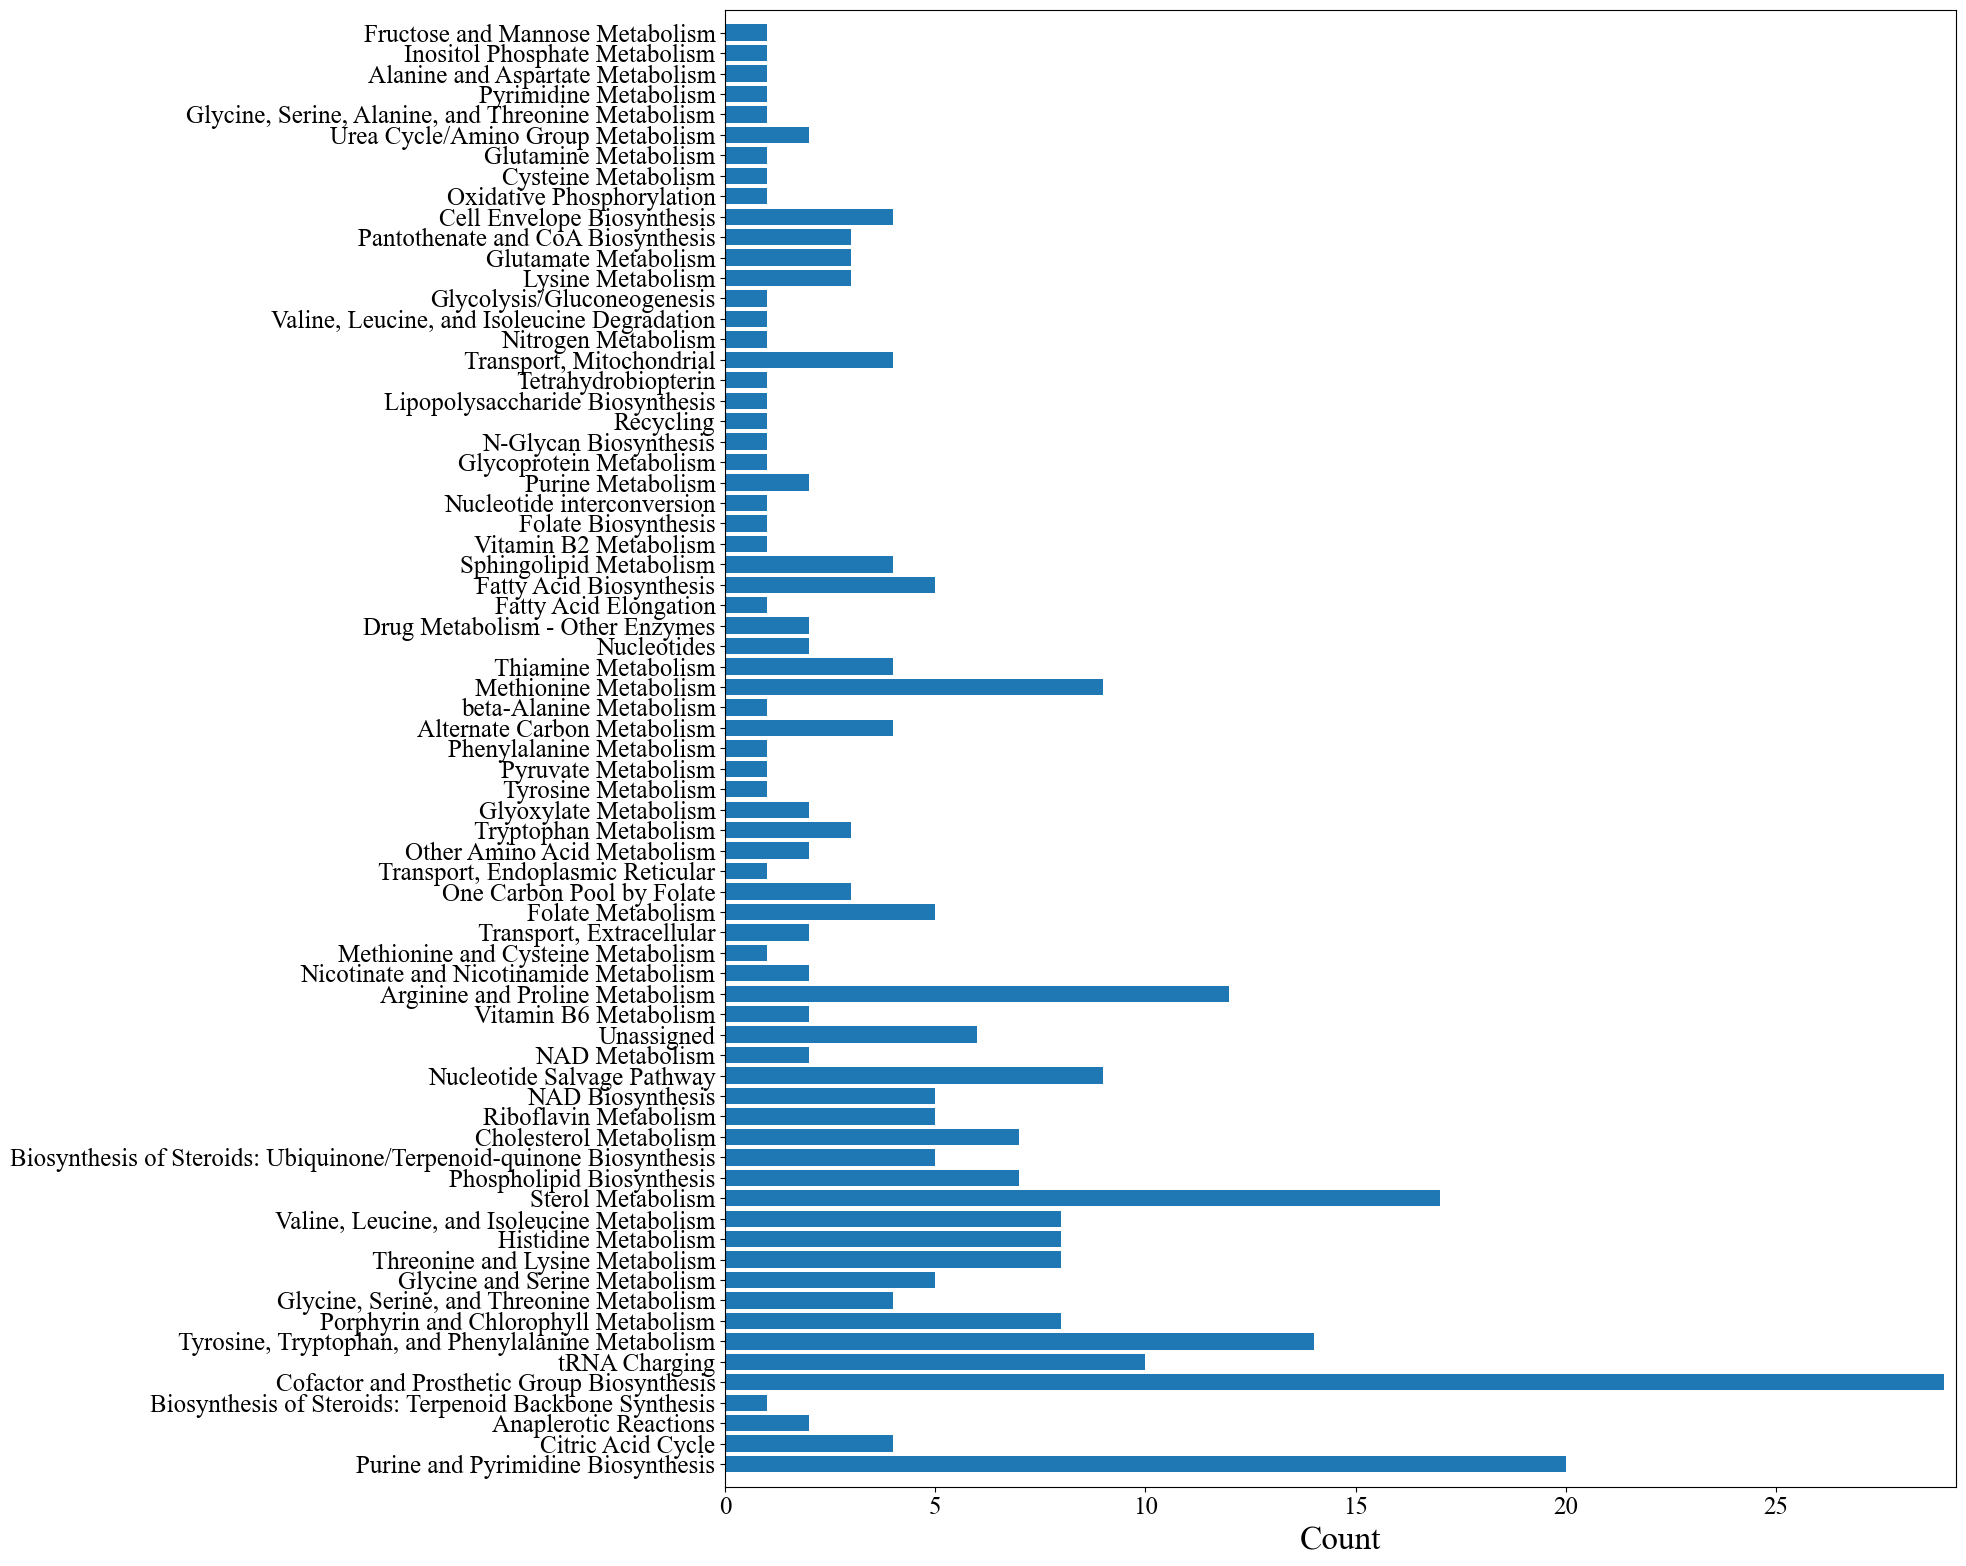

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the pathways into a list
essential_genes_pathways = {}
for gene_id in essential_genes:
    for g in gene_id:
        associated_reactions = lst.genes.get_by_id(g).reactions
        pathways = set()
        for reaction in associated_reactions:
            for pathway in reaction.subsystem.split(" / "):
                if not pathway:  # If the pathway is unspecified, add 'unspecified'
                    pathways.add('Unassigned')
                else:
                    pathways.add(pathway)

        essential_genes_pathways[g] = tuple(pathways)  # Convert the set to a tuple

all_pathways = [pathway for pathways in essential_genes_pathways.values() for pathway in pathways]

# Set the font family to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})  # Adjust the font size as needed


# Count the occurrences of each pathway
pathway_counts = Counter(all_pathways)

# Create a bar chart
pathways, counts = zip(*pathway_counts.items())

plt.figure(figsize=(20, 16))
plt.barh(pathways, counts)
plt.margins(0.01,0.01)
plt.xlabel('Count',fontsize=24)
plt.tight_layout()
# plt.savefig('essential_gene_pathways_gt1e4.png')
plt.show()

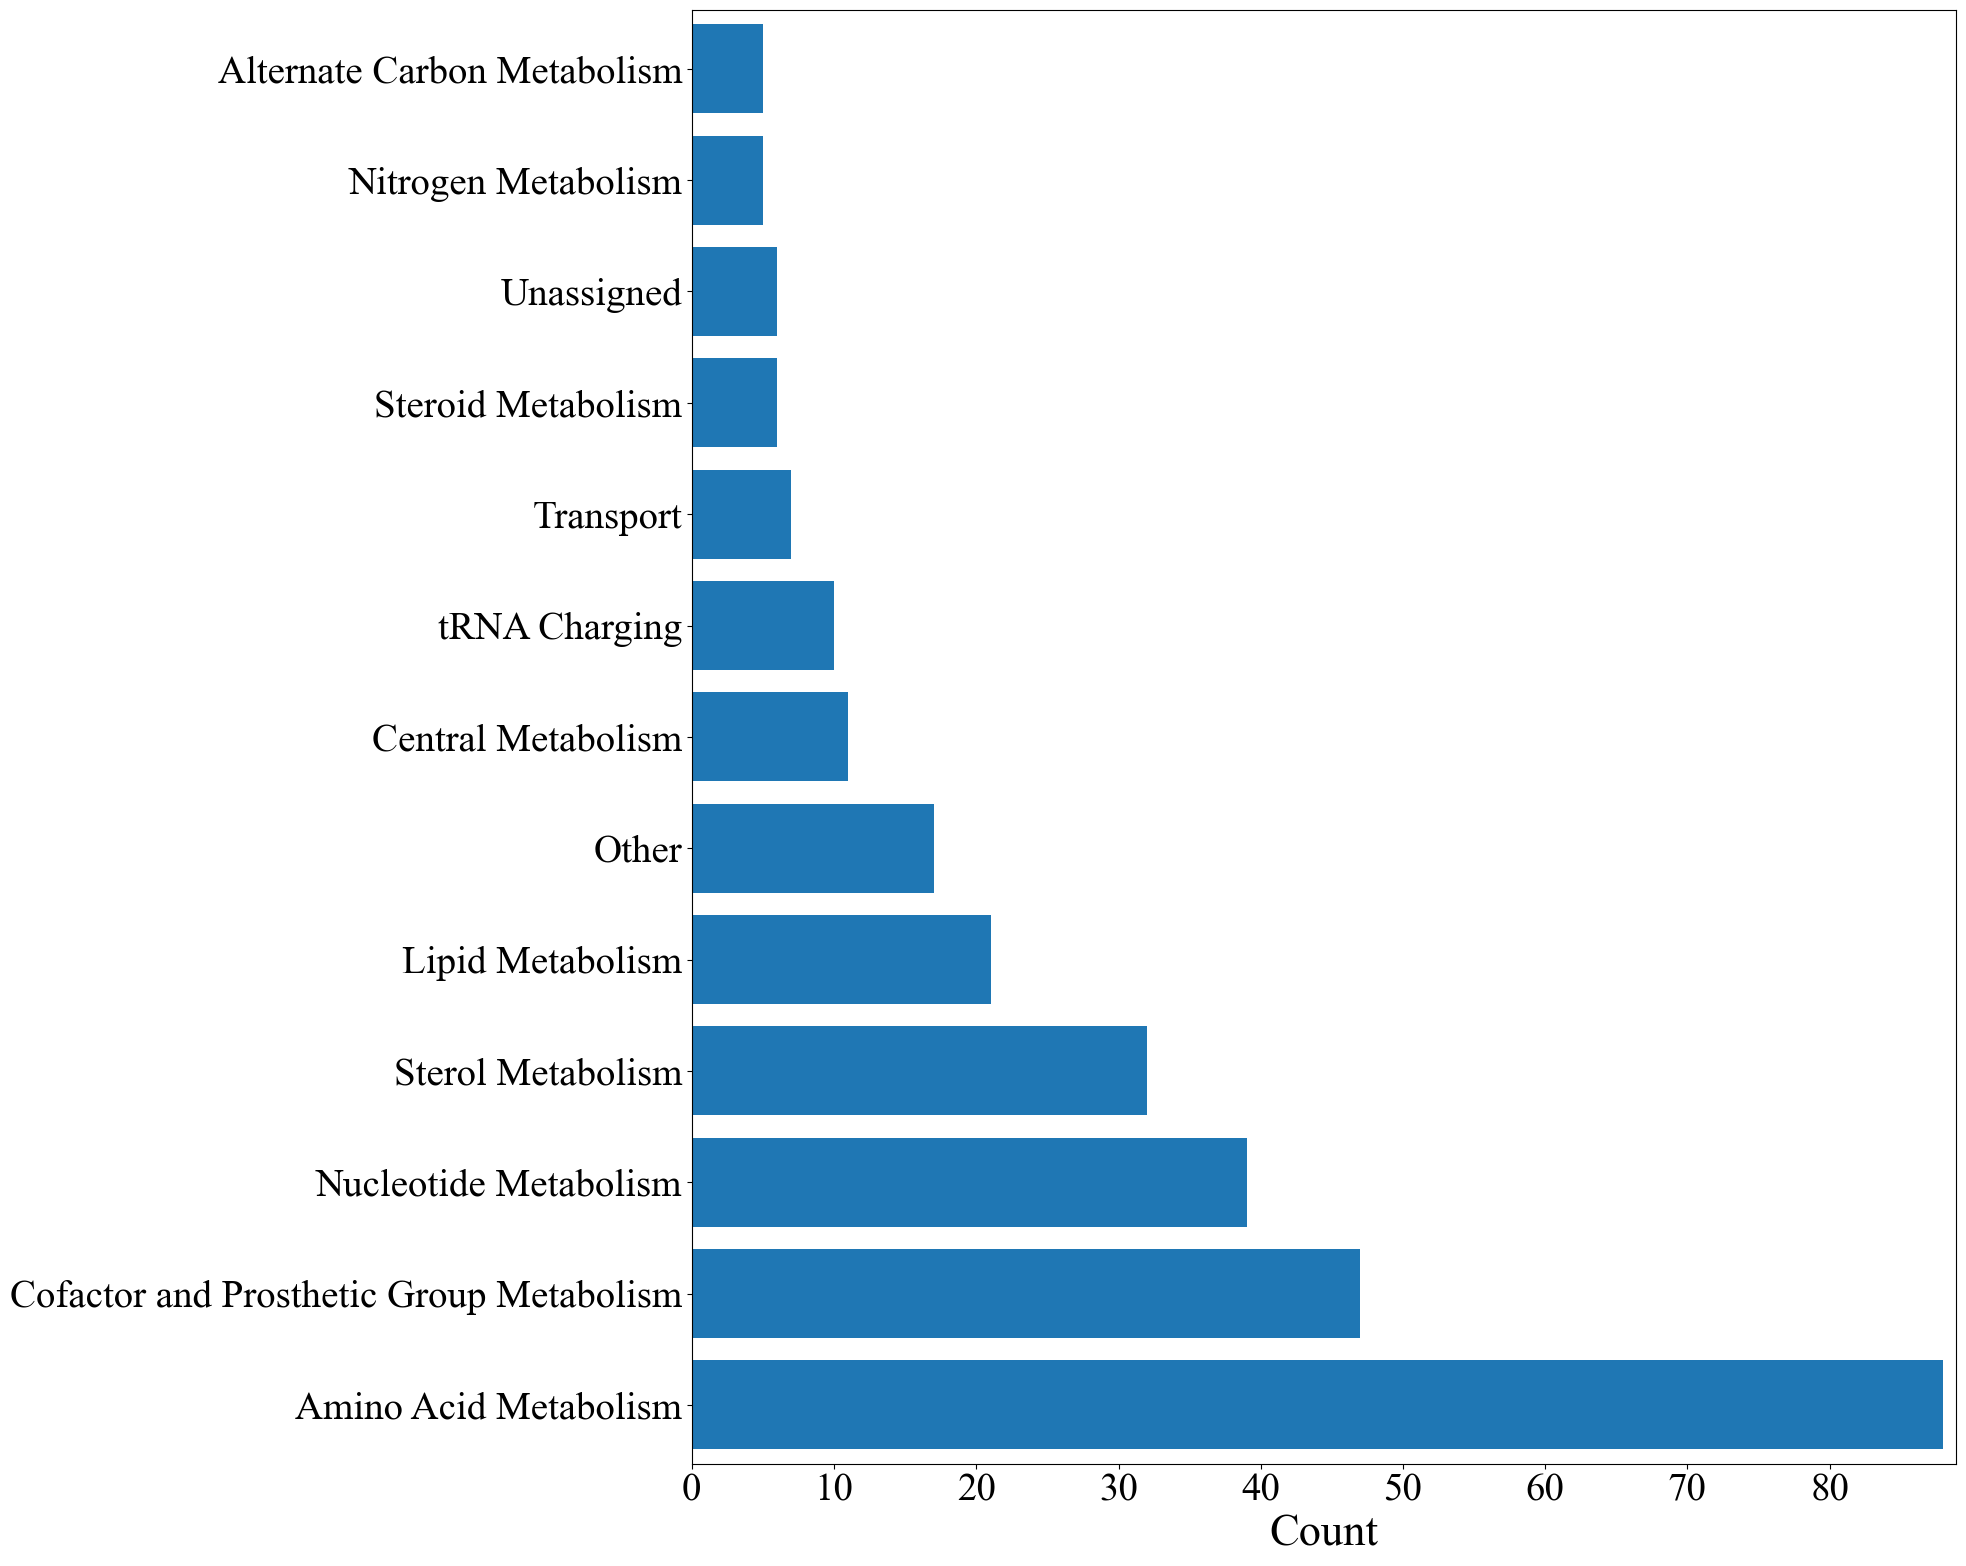

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

essential_genes_pathways = {}
for gene_id in essential_genes:
    for g in gene_id:
        associated_reactions = lst.genes.get_by_id(g).reactions
        pathways = set()
        for reaction in associated_reactions:
            for pathway in reaction.subsystem.split(" / "):
                if not pathway:  # If the pathway is unspecified, add 'unspecified'
                    pathways.add('Unassigned')
                else:
                    pathways.add(pathway)

        essential_genes_pathways[g] = tuple(pathways)  # Convert the set to a tuple

all_pathways = [pathway for pathways in essential_genes_pathways.values() for pathway in pathways]

# Mapping dictionaries for combining terms
amino_acid_mapping = {
    'Tryptophan Metabolism': 'Amino Acid Metabolism',
    'Tyrosine, Tryptophan, and Phenylalanine Metabolism': 'Amino Acid Metabolism',
    'Valine, Leucine, and Isoleucine Metabolism': 'Amino Acid Metabolism',
    'Threonine and Lysine Metabolism': 'Amino Acid Metabolism',
    'Methionine Metabolism': 'Amino Acid Metabolism',
    'Arginine and Proline Metabolism': 'Amino Acid Metabolism',
    'Glutamate Metabolism': 'Amino Acid Metabolism',
    'Histidine Metabolism': 'Amino Acid Metabolism',
    'Glycine, Serine, and Threonine Metabolism': 'Amino Acid Metabolism',
    'Glycine, Serine, Alanine, and Threonine Metabolism': 'Amino Acid Metabolism',
    'Lysine Metabolism': 'Amino Acid Metabolism',
    'Other Amino Acid Metabolism': 'Amino Acid Metabolism',
    'Cysteine Metabolism': 'Amino Acid Metabolism',
    'Valine, Leucine, and Isoleucine Degradation': 'Amino Acid Metabolism',
    'Glutamine Metabolism': 'Amino Acid Metabolism',
    'Alanine and Aspartate Metabolism': 'Amino Acid Metabolism',
    'Glycine and Serine Metabolism': 'Amino Acid Metabolism',
    'Methionine and Cysteine Metabolism':'Amino Acid Metabolism',
    'Phenylalanine Metabolism': 'Amino Acid Metabolism',
    'Tyrosine Metabolism': 'Amino Acid Metabolism',
    'beta-Alanine Metabolism':'Amino Acid Metabolism',

}

nucleotide_mapping = {
    'Purine and Pyrimidine Biosynthesis': 'Nucleotide Metabolism',
    'Purine Metabolism': 'Nucleotide Metabolism',
    'Pyrimidine Metabolism': 'Nucleotide Metabolism',
    'Nucleotides': 'Nucleotide Metabolism',
    'Nucleotide interconversion':'Nucleotide Metabolism',
    'Nucleotide Salvage Pathway': 'Nucleotide Metabolism',
    'One carbon pool by folate': 'Nucleotide Metabolism',
    'Thiamine Metabolism': 'Nucleotide Metabolism',
    'Drug Metabolism - other enzymes': 'Nucleotide Metabolism',
}

transport_mapping = {
    'Transport, Mitochondrial': 'Transport',
    'Transport, Peroxisomal': 'Transport',
    'Transport, Extracellular': 'Transport',
    'Transport, Endoplasmic Reticular': 'Transport',
}
lipid_mapping = {
    'Fatty acid oxidation': 'Lipid Metabolism',
    'Phospholipid Biosynthesis': 'Lipid Metabolism',
    'Fatty acid elongation': 'Lipid Metabolism',
    'Fatty acid, Biosynthesis': 'Lipid Metabolism',
    'Sphingolipid Metabolism': 'Lipid Metabolism',
    'Fatty Acid Metabolism': 'Lipid Metabolism',
    'Fatty Acid, Biosynthesis': 'Lipid Metabolism',
    'Fatty Acid Biosynthesis': 'Lipid Metabolism',
    'Fatty Acid Elongation': 'Lipid Metabolism',
    'Cell Envelope Biosynthesis': 'Lipid Metabolism',

}

cofactor_mapping = {
    'NAD Metabolism': 'Cofactor and Prosthetic Group Metabolism',
    'Vitamin B2 Metabolism': 'Cofactor and Prosthetic Group Metabolism',
    'Pantothenate and CoA Biosynthesis': 'Cofactor and Prosthetic Group Metabolism',
    'Vitamin B6 Metabolism': 'Cofactor and Prosthetic Group Metabolism',
    'NAD Biosynthesis': 'Cofactor and Prosthetic Group Metabolism',
    'Riboflavin Metabolism': 'Cofactor and Prosthetic Group Metabolism',
    'Cofactor and Prosthetic Group Biosynthesis':'Cofactor and Prosthetic Group Metabolism',

#     'Fatty Acid Metabolism': 'Lipid Metabolism'
}
steroid_mapping = {
    'Biosynthesis of Steroids: Terpenoid Backbone Synthesis': 'Steroid Metabolism',
    'Biosynthesis of Steroids: Ubiquinone/Terpenoid-quinone Biosynthesis': 'Steroid Metabolism',
}

sterol_mapping = {
    'Cholesterol Metabolism': 'Sterol Metabolism',
    'Porphyrin and Chlorophyll Metabolism': 'Sterol Metabolism',
}

alternate_mapping = {
    'Fructose and Mannose Metabolism':'Alternate Carbon Metabolism',
    'Propanoate Metabolism':'Alternate Carbon Metabolism',
    'Butanoate Metabolism':'Alternate Carbon Metabolism',
    
}


other_mapping = {
    'Recycling':'Other',
    'N-Glycan Biosynthesis':'Other',
    'Glycoprotein Metabolism':'Other',
    'Lipopolysaccharide Biosynthesis':'Other',
    'Folate Biosynthesis':'Other',
    'Inositol Phosphate Metabolism':'Other',
    'Folate Metabolism':'Other',
    'Tetrahydrobiopterin':'Other',
    'Drug Metabolism - Other Enzymes':'Other',
    'One Carbon Pool by Folate':'Other',
}

central_mapping = {
    'Glycolysis/Gluconeogenesis':'Central Metabolism',
    'Oxidative Phosphorylation':'Central Metabolism',
    'Glyoxylate Metabolism':'Central Metabolism',
    'Anaplerotic Reactions':'Central Metabolism',
    'Citric Acid Cycle':'Central Metabolism',
    'Pyruvate Metabolism':'Central Metabolism',
}

nitrogen_mapping = {
    'Nicotinate and Nicotinamide Metabolism': 'Nitrogen Metabolism',
    'Urea Cycle/Amino Group Metabolism':'Nitrogen Metabolism',
    
}
# Update the pathways list with mapped categories
mapped_pathways = [
    amino_acid_mapping.get(pathway, 
    nucleotide_mapping.get(pathway, 
    transport_mapping.get(pathway, 
    lipid_mapping.get(pathway, 
    cofactor_mapping.get(pathway,
    steroid_mapping.get(pathway,
    sterol_mapping.get(pathway, 
    other_mapping.get(pathway,
    central_mapping.get(pathway,
    nitrogen_mapping.get(pathway,
    alternate_mapping.get(pathway,pathway)))))))))))
    for pathway in all_pathways
]



# Count the occurrences of each pathway (updated list)
mapped_pathway_counts = Counter(mapped_pathways)

sorted_pathway_counts = sorted(mapped_pathway_counts.items(), key=lambda x: x[1],reverse=True)

# Unpack the sorted data
sorted_pathways, counts = zip(*sorted_pathway_counts)

# Create a bar chart with the sorted pathway list
plt.figure(figsize=(20, 16))
plt.barh(sorted_pathways, counts)
plt.margins(0.01, 0.01)
plt.xlabel('Count', fontsize=32)
# plt.ylabel('Pathway', fontsize=32)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

# plt.title('Pathways in Essential Genes', fontsize=28)
plt.tight_layout()
plt.savefig('fig.png')
plt.show()


